# CRISP-DM steps:
1. Business Understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

## Business Understanding ⁉

This project aims to analyze and predict housing trends in both Seattle and Boston using Airbnb data. By examining various factors such as reviews, time frames, and neighborhood characteristics, we seek to provide insights that will enhance Airbnb’s business strategies. Here are the key questions we aim to address:

1. **What impact do property descriptions, reviews, 'experiences_offered', and neighborhood overviews have on pricing?**  
   This includes investigating how ratings and reviews influence pricing trends across different neighborhoods.

2. **What are the peak times for Airbnb bookings in Boston, and how do prices fluctuate during these periods?**  
   Understanding seasonal demand will help in optimizing pricing strategies.

3. **How does the availability of properties (as a proxy for peak or low booking periods) influence the price of Airbnb listings in Seattle?**  
   We aim to uncover whether periods of high or low availability correlate with price changes.

4. **How do different room types and property types affect the average price of Airbnb listings in Seattle compared to Boston?**  
   This will help us understand how room and property types impact pricing in each city.

5. **Imagine you're planning a trip to either Seattle or Boston, and you're browsing Airbnb listings. You notice something curious: some places with the same number of bedrooms are priced quite differently. You wonder, "Is it just the location, or does the number of bathrooms also play a role in how much I’ll pay?"**  
   This question explores whether the number of bathrooms, alongside bedrooms, affects pricing.

6. **How do Superhost and non-Superhost listings compare in terms of pricing in Seattle and Boston?**  
   We’ll investigate if Superhost status influences the pricing of Airbnb listings.

7. **What is the relationship between the number of reviews and the price of listings in Seattle and Boston?**  
   This question aims to determine if more reviews correlate with higher prices.

8. **How does the charm of each neighborhood influence the average price of listings in the vibrant cities of Seattle and Boston?**  
   We’ll analyze whether neighborhood characteristics affect pricing.

9. **How much does the convenience of instant booking impact the price in Seattle and Boston?**  
   This question explores if instant booking options come with a price premium.

10. **How do Seattle and Boston differ when it comes to pricing for extra guests?**  
    Dive into the scatter of extra people charges and see how each city adjusts its rates.

## Business Deployment

Based on our analysis, we will provide actionable recommendations aimed at improving business outcomes. These may include strategies for optimizing pricing, increasing customer satisfaction, fostering stronger host-user relationships, and enhancing Airbnb’s market presence in both cities. A detailed comparison of Seattle and Boston will help identify location-specific opportunities to attract more customers and create win-win agreements between hosts and guests.

## Data Understanding (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import category_encoders as ce
from sklearn.decomposition import PCA


In [2]:
boston = pd.read_csv("/content/boston_listings.csv")
boston.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [3]:
seattle = pd.read_csv("/content/Seattle _listings.csv")
seattle.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


In [4]:
seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url',
                   'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
                   'host_name', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped',
                   'license']

boston= boston.drop(columns=columns_to_drop)
seattle= seattle.drop(columns=columns_to_drop)

print(boston.shape)
print(seattle.shape)

(3585, 80)
(3818, 77)


In [6]:
threshold_boston = len(boston) *0.8
threshold_seattle = len(seattle) *0.8
boston = boston.dropna(thresh=threshold_boston,axis=1)
seattle = seattle.dropna(thresh=threshold_seattle,axis=1)
print(boston.shape)
print(seattle.shape)

(3585, 54)
(3818, 67)


In [7]:
boston.dropna(inplace=True)
seattle.dropna(inplace=True)
print(boston.shape)
print(seattle.shape)

(2457, 54)
(2175, 67)


<ipython-input-7-56339cfb7e95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle.dropna(inplace=True)


## 1. What impact do property descriptions, reviews, 'experiences_offered' have on pricing?

columns : description, experiences_offered,review scores value, vs price

In [8]:
print(seattle["experiences_offered"].unique())
print(boston["experiences_offered"].unique())

['none']
['none']


In [9]:
seattle.drop(columns=["experiences_offered"],inplace=True)
boston.drop(columns=["experiences_offered"],inplace=True)

<ipython-input-9-2f4cc9f903ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle.drop(columns=["experiences_offered"],inplace=True)


In [10]:
seattle["review_scores_value"].unique()

array([10.,  9.,  8.,  7.,  6.,  4.,  2.])

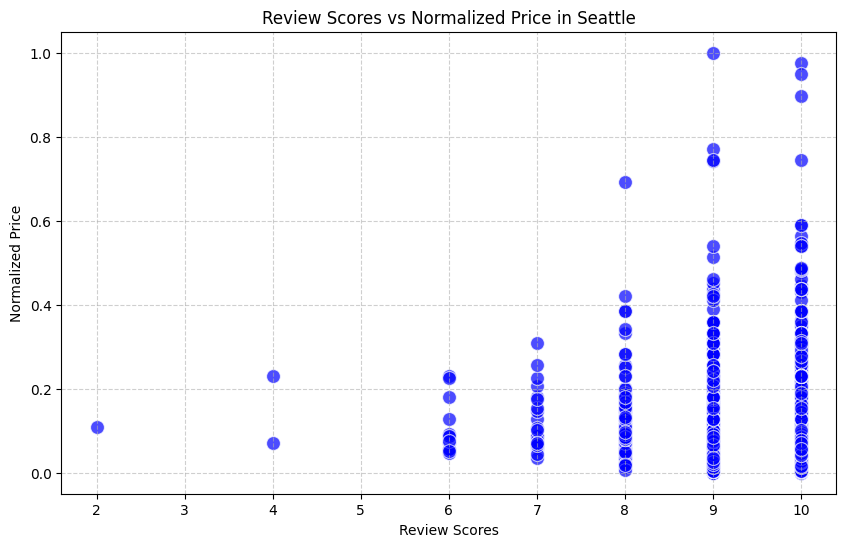

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


seattle['price'] = seattle['price'].astype(str)

# Convert price column to numeric, handling any errors and removing non-numeric characters
seattle['price'] = pd.to_numeric(seattle['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
# Normalize prices
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(seattle['price'].values.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=seattle['review_scores_value'], y=normalized_prices, marker='o', color='b', s=100, alpha=0.7)
plt.title('Review Scores vs Normalized Price in Seattle')
plt.xlabel('Review Scores')
plt.ylabel('Normalized Price')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()



insights : a positive correlation between review scores and normalized prices for listings in Seattle. Generally, higher review scores are associated with higher normalized prices, indicating that better-reviewed listings tend to charge more. However, there are some outliers where listings with high review scores have lower prices and vice versa, suggesting that other factors might be influencing these deviations. The wide range in normalized prices for listings with similar review scores highlights the variability in pricing strategies, possibly due to differences in location, amenities, or listing type. This analysis can provide valuable insights into how review scores impact pricing and help inform pricing strategies for similar listings.

In [12]:
boston.columns

Index(['name', 'summary', 'description', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_

In [13]:
''' we dropped review_scores in boston as it had alot of null values so we will focus on description then on boston'''

' we dropped review_scores in boston as it had alot of null values so we will focus on description then on boston'

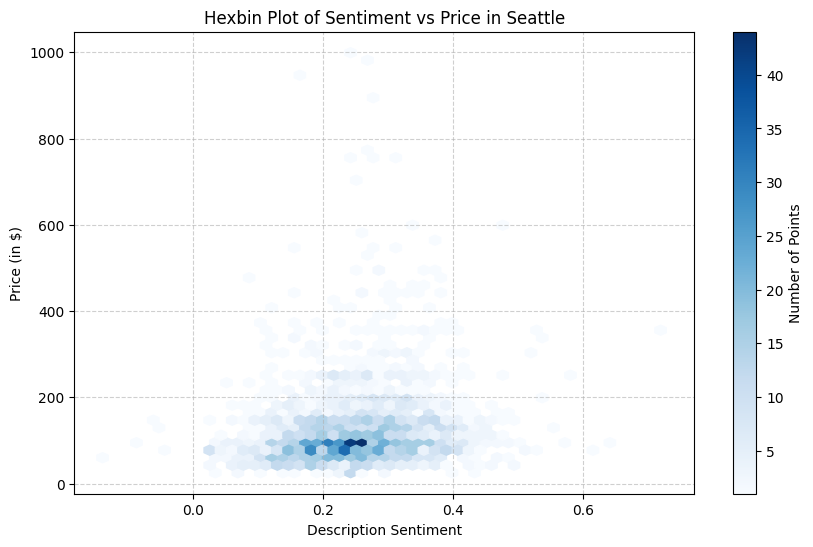

In [14]:
from textblob import TextBlob

# Apply sentiment analysis to descriptions
seattle['description'] = seattle['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
plt.hexbin(seattle['description'], seattle['price'], gridsize=50, cmap='Blues', mincnt=1)

plt.colorbar(label='Number of Points')
plt.title('Hexbin Plot of Sentiment vs Price in Seattle')
plt.xlabel('Description Sentiment')
plt.ylabel('Price (in $)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


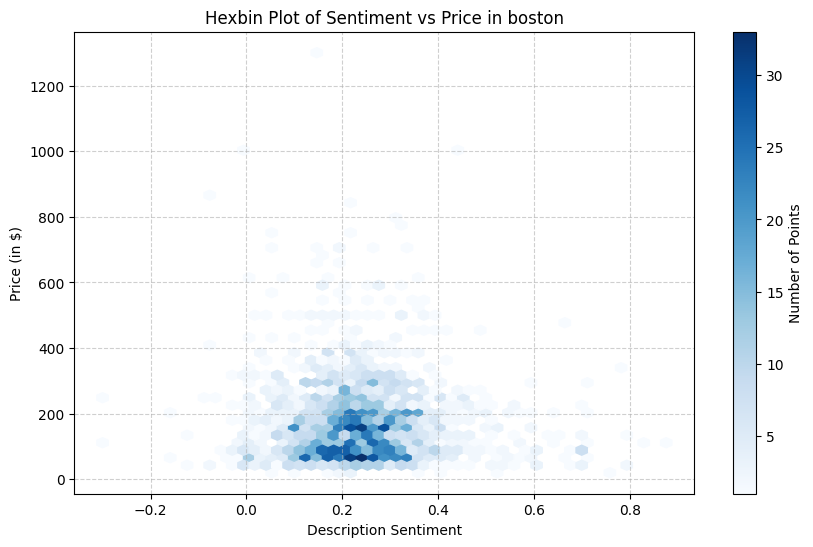

In [15]:
boston['price'] = boston['price'].astype(str)

# Convert price column to numeric, handling any errors and removing non-numeric characters
boston['price'] = pd.to_numeric(boston['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
# Normalize prices
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(boston['price'].values.reshape(-1, 1)).flatten()
# Ensure the 'description' column contains strings before applying TextBlob
boston['description'] = boston['description'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
plt.hexbin(boston['description'], boston['price'], gridsize=50, cmap='Blues', mincnt=1)

plt.colorbar(label='Number of Points')
plt.title('Hexbin Plot of Sentiment vs Price in boston')
plt.xlabel('Description Sentiment')
plt.ylabel('Price (in $)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

insights : Both cities show a trend where lower sentiment values are associated with lower prices. However, in Seattle, the concentration of lower sentiment values is more pronounced in listings priced under $200, while in Boston, this extends to listings priced below $600. This indicates that in Boston, even listings with moderately low sentiment can still command higher prices compared to Seattle.
Overall, while both cities show a correlation between sentiment and price, Boston’s market appears to be more diverse and capable of supporting higher prices even for listings with lower sentiment values.

## 2. What are the peak times for Airbnb bookings in Boston, and how do prices fluctuate during these periods?

In [16]:
boston.columns

Index(['name', 'summary', 'description', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_

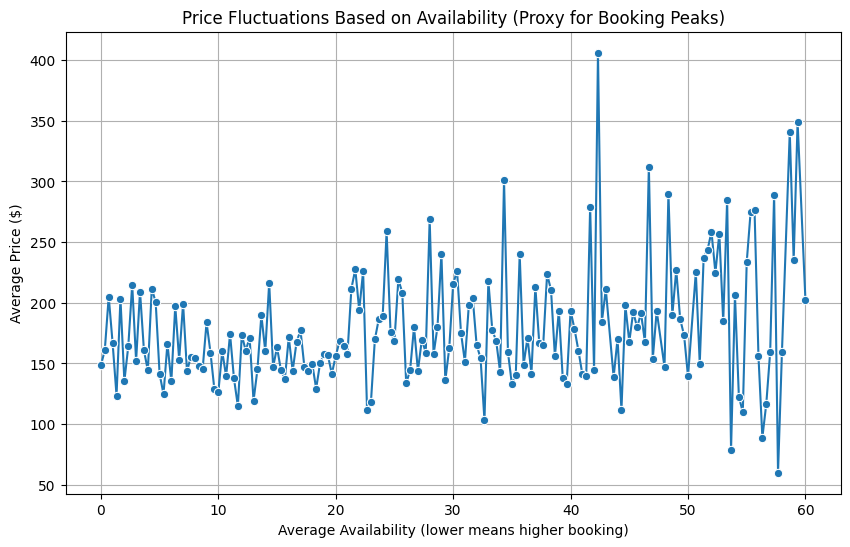

<ipython-input-17-53ef76bd5aff>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_fluctuations = boston.groupby('booking_period')['price'].mean().reset_index()


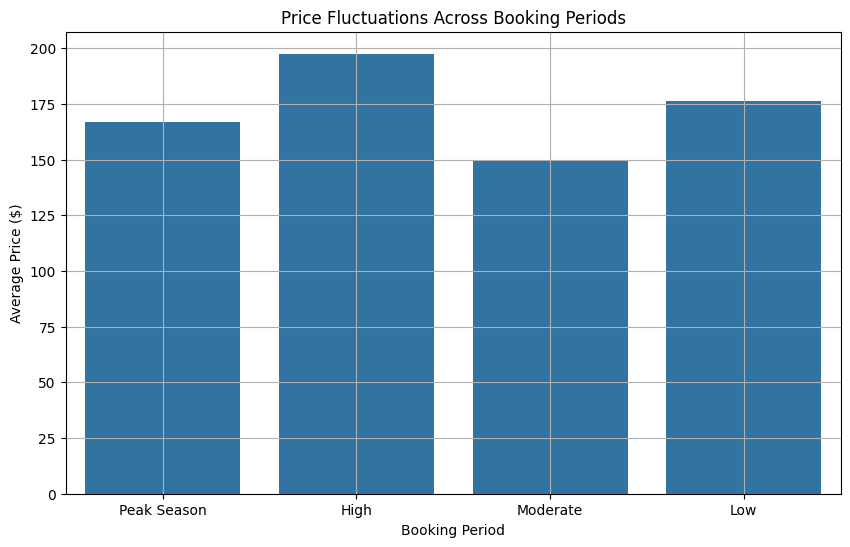

In [17]:

# Create a new column 'average_availability' by averaging the availability over 30, 60, and 90 days
boston['average_availability'] = (boston['availability_30'] + boston['availability_60'] + boston['availability_90']) / 3
peak_periods = boston.groupby('average_availability')['price'].mean().reset_index()

# Plotting the relationship between availability (inverse of peak bookings) and price
plt.figure(figsize=(10, 6))
sns.lineplot(x='average_availability', y='price', data=peak_periods, marker='o')
plt.title('Price Fluctuations Based on Availability (Proxy for Booking Peaks)')
plt.xlabel('Average Availability (lower means higher booking)')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()


boston['booking_period'] = pd.cut(boston['availability_365'],
                                  bins=[0, 90, 180, 270, 365],
                                  labels=['Peak Season', 'High', 'Moderate', 'Low'])

# Grouping by 'booking_period' to analyze prices during those times
price_fluctuations = boston.groupby('booking_period')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='booking_period', y='price', data=price_fluctuations)
plt.title('Price Fluctuations Across Booking Periods')
plt.xlabel('Booking Period')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()


## 3. How does the availability of properties (as a proxy for peak or low booking periods) influence the price of Airbnb listings in Seattle?

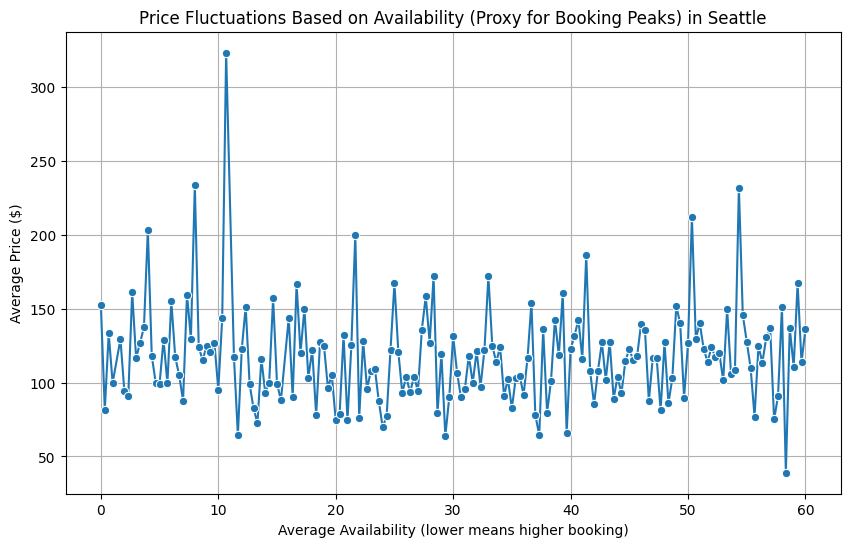

<ipython-input-18-cd0f0814b875>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_fluctuations = seattle.groupby('booking_period')['price'].mean().reset_index()


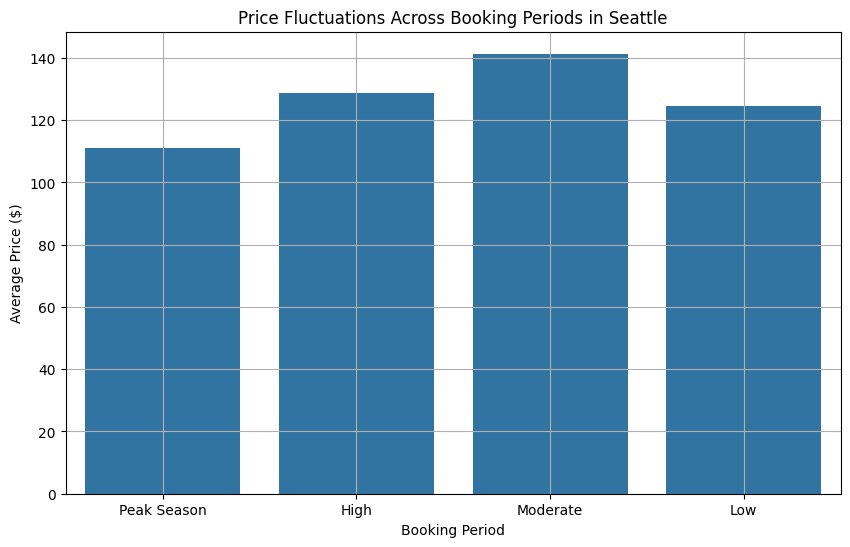

In [18]:
# Create a new column 'average_availability' by averaging the availability over 30, 60, and 90 days
seattle['average_availability'] = (seattle['availability_30'] + seattle['availability_60'] + seattle['availability_90']) / 3

peak_periods = seattle.groupby('average_availability')['price'].mean().reset_index()

# Plotting the relationship between availability (inverse of peak bookings) and price
plt.figure(figsize=(10, 6))
sns.lineplot(x='average_availability', y='price', data=peak_periods, marker='o')
plt.title('Price Fluctuations Based on Availability (Proxy for Booking Peaks) in Seattle')
plt.xlabel('Average Availability (lower means higher booking)')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

seattle['booking_period'] = pd.cut(seattle['availability_365'],
                                  bins=[0, 90, 180, 270, 365],
                                  labels=['Peak Season', 'High', 'Moderate', 'Low'])

# Grouping by 'booking_period' to analyze prices during those times
price_fluctuations = seattle.groupby('booking_period')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='booking_period', y='price', data=price_fluctuations)
plt.title('Price Fluctuations Across Booking Periods in Seattle')
plt.xlabel('Booking Period')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()


The comparison between Boston and Seattle reveals distinct patterns in price fluctuations based on availability. In Boston, prices show significant variability with spikes during periods of lower availability, indicating higher booking peaks.In Seattle, the scatter plot with a line of best fit shows a similar trend where prices increase as availability decreases. The bar chart for Seattle also categorizes booking periods, showing the highest prices during peak season and high demand periods, but with a slightly lower overall price range compared to Boston. This comparison highlights that while both cities experience price increases during high booking periods, Boston has a broader price range and more pronounced spikes, suggesting a more dynamic pricing strategy in response to demand fluctuations.

## 4. How do different room types and property types affect the average price of Airbnb listings in Seattle compared to Boston?

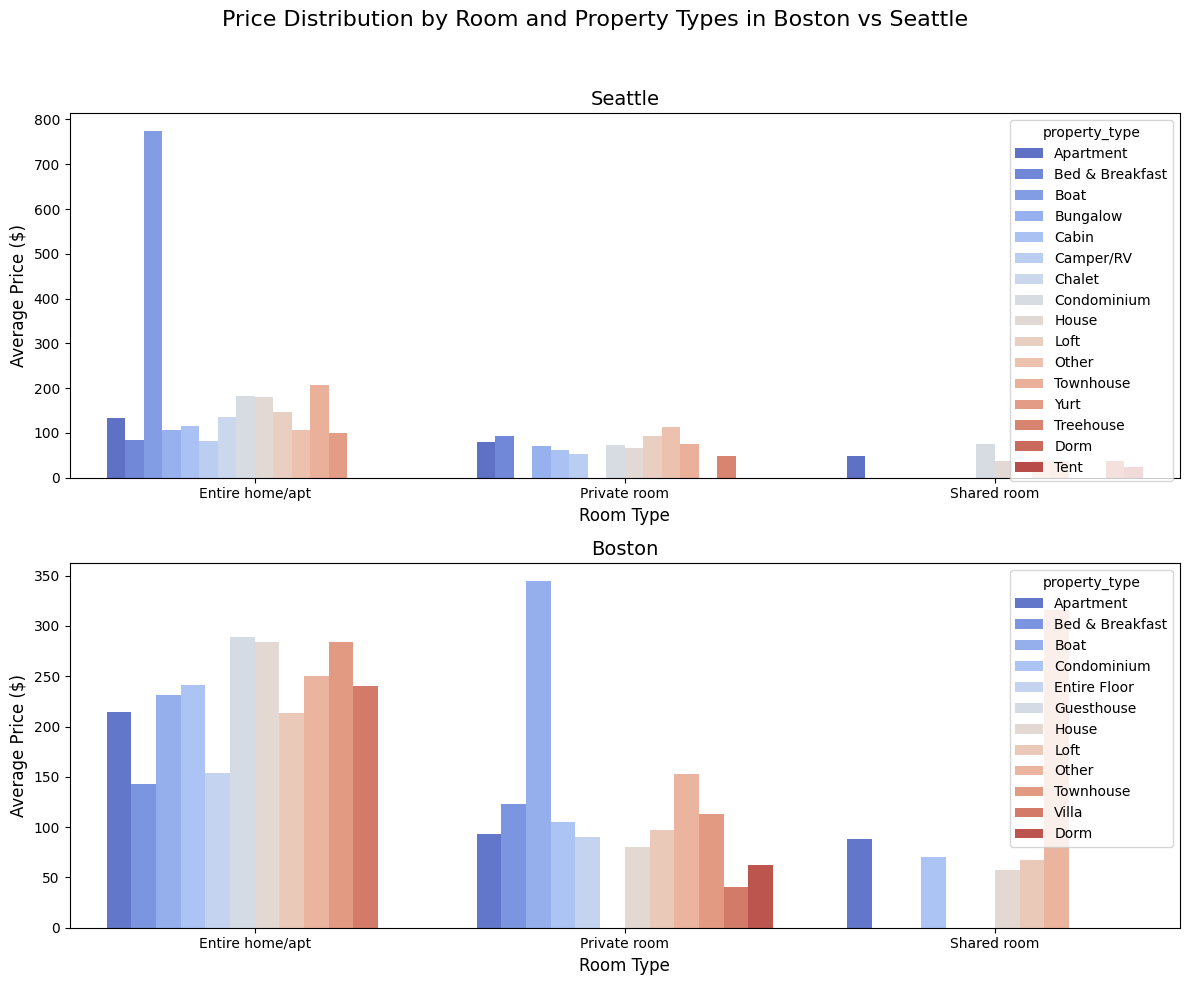

In [19]:
room_property_price_seattle = seattle.groupby(['room_type', 'property_type'])['price'].mean().reset_index()
room_property_price_boston = boston.groupby(['room_type', 'property_type'])['price'].mean().reset_index()
# Create a subplot figure with two rows and one column (for Boston and Seattle)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Price Distribution by Room and Property Types in Boston vs Seattle', fontsize=16)

# Seattle Room Type and Property Type
sns.barplot(x='room_type', y='price', hue='property_type', data=room_property_price_seattle, ax=axes[0], palette='coolwarm')
axes[0].set_title('Seattle', fontsize=14)
axes[0].set_xlabel('Room Type', fontsize=12)
axes[0].set_ylabel('Average Price ($)', fontsize=12)

# Boston Room Type and Property Type
sns.barplot(x='room_type', y='price', hue='property_type', data=room_property_price_boston, ax=axes[1], palette='coolwarm')
axes[1].set_title('Boston', fontsize=14)
axes[1].set_xlabel('Room Type', fontsize=12)
axes[1].set_ylabel('Average Price ($)', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In Boston, the average prices for entire homes/apartments are generally higher across most property types compared to Seattle. For instance, apartments and condominiums in Boston tend to have higher average prices than those in Seattle. Additionally, Boston shows a wider variety of property types with higher prices, such as Bed & Breakfasts and Guesthouses.

In Seattle, while the prices for entire homes/apartments are lower on average, there is a noticeable presence of unique property types like boats and yurts, which are less common in Boston. Private rooms and shared rooms in Seattle also tend to be priced lower compared to Boston.

Boston’s accommodation market appears to command higher prices, especially for entire homes and traditional property types, while Seattle offers a more diverse range of unique and potentially more affordable options.

## 5. Imagine you're planning a trip to either Seattle or Boston, and you're browsing Airbnb listings. You notice something curious. some places with the same number of bedrooms are priced quite differently. You wonder, "Is it just the location, or does the number of bathrooms also play a role in how much I’ll pay?

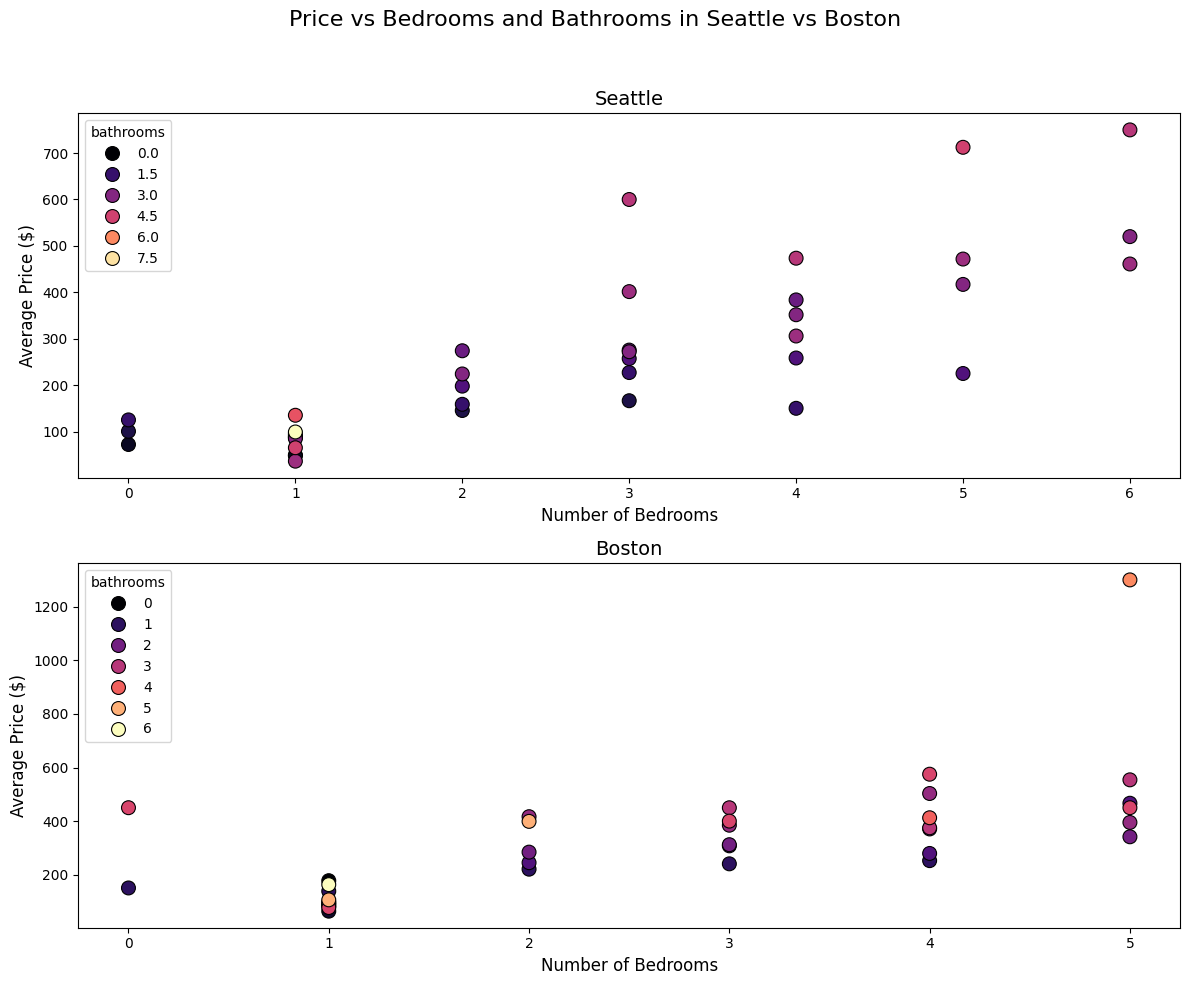

In [20]:
bed_bath_price_seattle = seattle.groupby(['bedrooms', 'bathrooms'])['price'].mean().reset_index()
bed_bath_price_boston = boston.groupby(['bedrooms', 'bathrooms'])['price'].mean().reset_index()
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Price vs Bedrooms and Bathrooms in Seattle vs Boston', fontsize=16)

# Scatter plot for Seattle
sns.scatterplot(x='bedrooms', y='price', hue='bathrooms', data=bed_bath_price_seattle, ax=axes[0], palette='magma', s=100, edgecolor='black')
axes[0].set_title('Seattle', fontsize=14)
axes[0].set_xlabel('Number of Bedrooms', fontsize=12)
axes[0].set_ylabel('Average Price ($)', fontsize=12)

# Scatter plot for Boston
sns.scatterplot(x='bedrooms', y='price', hue='bathrooms', data=bed_bath_price_boston, ax=axes[1], palette='magma', s=100, edgecolor='black')
axes[1].set_title('Boston', fontsize=14)
axes[1].set_xlabel('Number of Bedrooms', fontsize=12)
axes[1].set_ylabel('Average Price ($)', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In Seattle, the plot shows a clear trend where more bedrooms generally correlate with higher rent prices. The prices range from $0 to $700, with properties having more bathrooms (indicated by different colors) also tending to have higher rent prices.

In Boston, the trend is similar, with more bedrooms leading to higher rent prices. However, the price range is broader, extending up to $1200. This indicates a wider variation in rent prices for properties with the same number of bedrooms compared to Seattle. Properties with more bathrooms also tend to have higher rent prices, similar to the trend observed in Seattle.

## 6. How do Superhost and non-Superhost listings compare in terms of pricing in Seattle and Boston?

<ipython-input-21-a15cbd790a1a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='host_is_superhost', y='price', data=seattle, ax=axes[0], palette='Set3')
<ipython-input-21-a15cbd790a1a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='host_is_superhost', y='price', data=boston, ax=axes[1], palette='Set3')


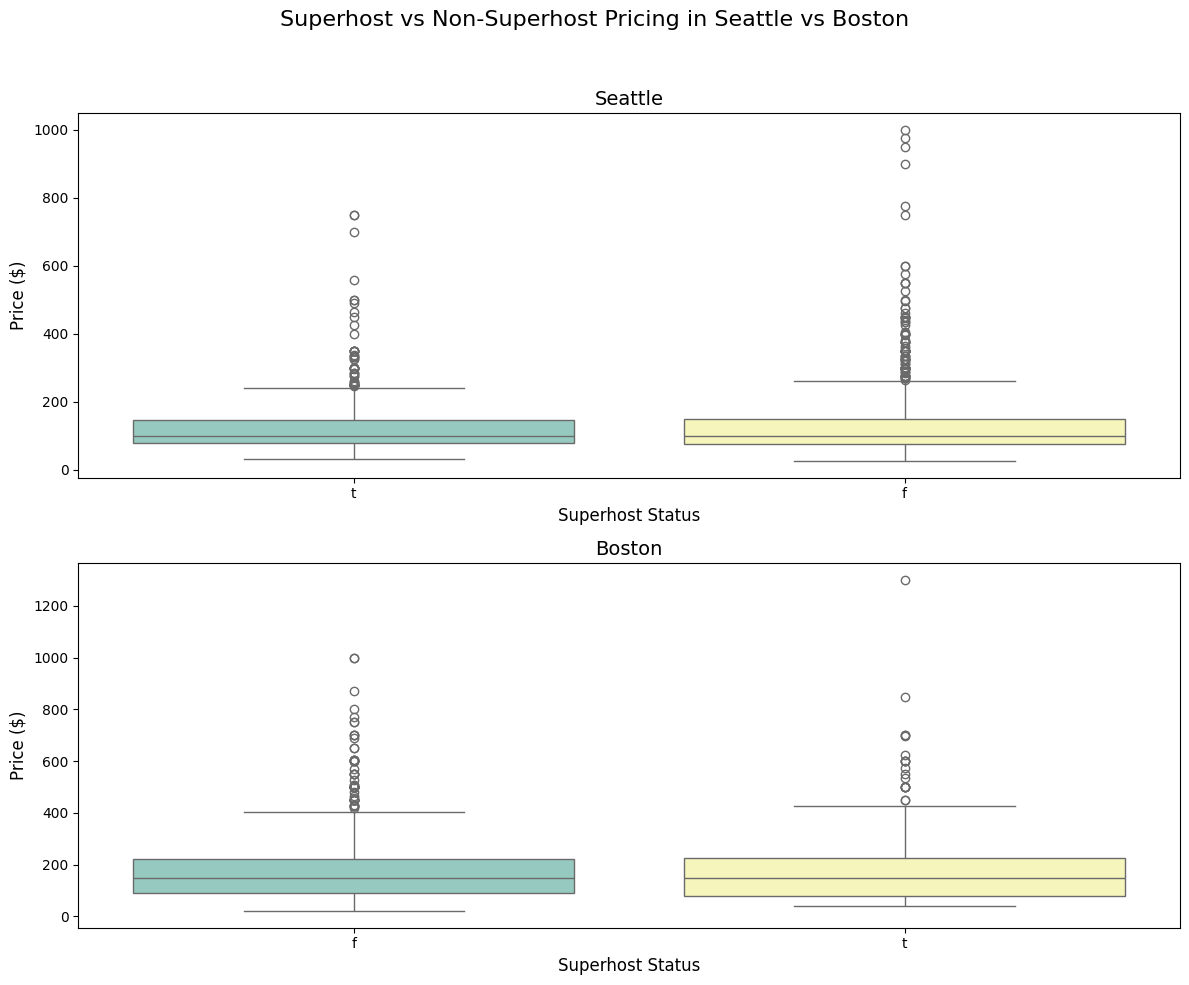

In [21]:
host_price_seattle = seattle.groupby(['host_is_superhost', 'host_listings_count'])['price'].mean().reset_index()
host_price_boston = boston.groupby(['host_is_superhost', 'host_listings_count'])['price'].mean().reset_index()
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Superhost vs Non-Superhost Pricing in Seattle vs Boston', fontsize=16)

# Boxplot for Seattle Superhost Prices
sns.boxplot(x='host_is_superhost', y='price', data=seattle, ax=axes[0], palette='Set3')
axes[0].set_title('Seattle', fontsize=14)
axes[0].set_xlabel('Superhost Status', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=12)

# Boxplot for Boston Superhost Prices
sns.boxplot(x='host_is_superhost', y='price', data=boston, ax=axes[1], palette='Set3')
axes[1].set_title('Boston', fontsize=14)
axes[1].set_xlabel('Superhost Status', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In Seattle, the plot shows that Superhosts generally have higher median prices compared to Non-Superhosts. The range of prices for Superhosts is also wider, indicating more variability in their pricing. Non-Superhosts have a narrower range and lower median prices.

In Boston, the trend is similar, with Superhosts commanding higher median prices than Non-Superhosts. However, the price range for both Superhosts and Non-Superhosts in Boston is broader compared to Seattle, suggesting more variability in pricing across the board.

## 7. What is the relationship between the number of reviews and the price of listings in Seattle and Boston?

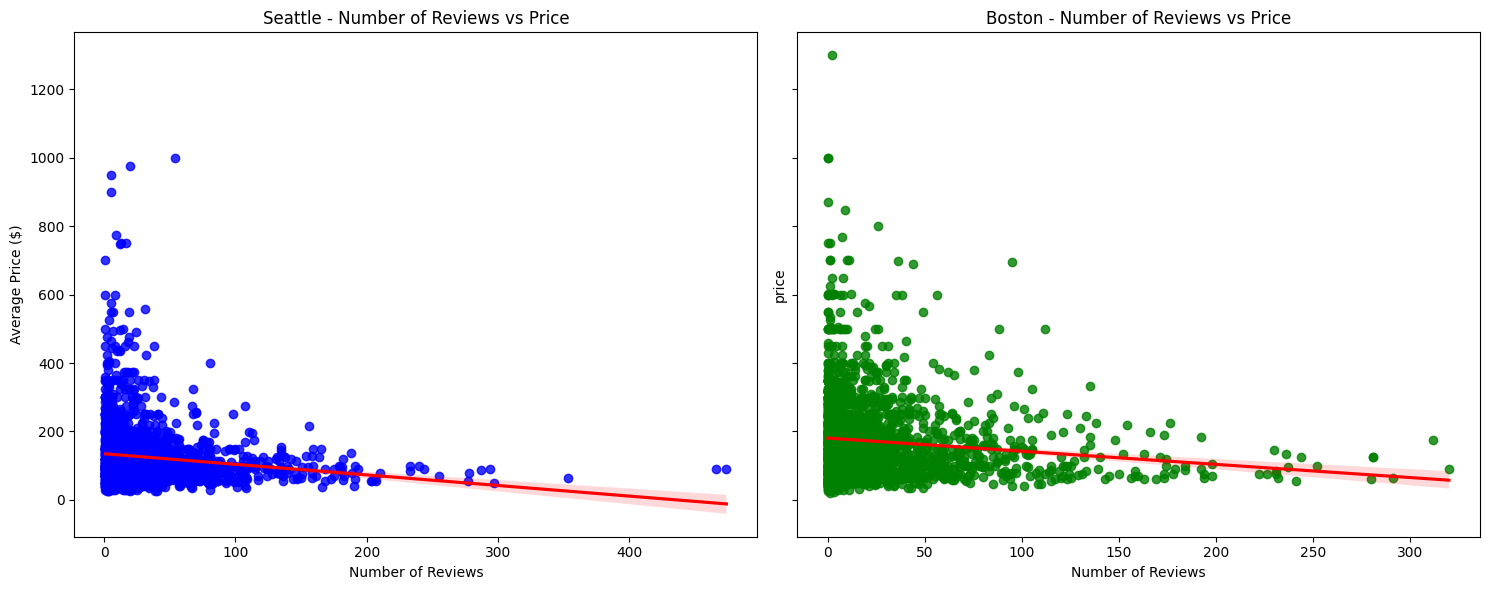

In [22]:
# Create subplots with two columns (Seattle and Boston)
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Seattle plot
sns.regplot(x='number_of_reviews', y='price', data=seattle, ax=axes[0], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
axes[0].set_title('Seattle - Number of Reviews vs Price')
axes[0].set_ylabel('Average Price ($)')
axes[0].set_xlabel('Number of Reviews')

# Boston plot
sns.regplot(x='number_of_reviews', y='price', data=boston, ax=axes[1], scatter_kws={'color':'green'}, line_kws={'color':'red'})
axes[1].set_title('Boston - Number of Reviews vs Price')
axes[1].set_xlabel('Number of Reviews')

plt.tight_layout()
plt.show()




 Both cities show that listings with more reviews tend to have higher prices. However, Boston’s market shows fewer extreme outliers at lower review counts, suggesting a more stable pricing strategy for listings with fewer reviews.

## 8. How does the charm of each neighborhood influence the average price of listings in the vibrant cities of Seattle and Boston?

<ipython-input-23-bf653ebece4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood', y='price', data=neighborhood_price_seattle, palette='Blues')
<ipython-input-23-bf653ebece4a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood', y='price', data=neighborhood_price_boston, palette='Greens')


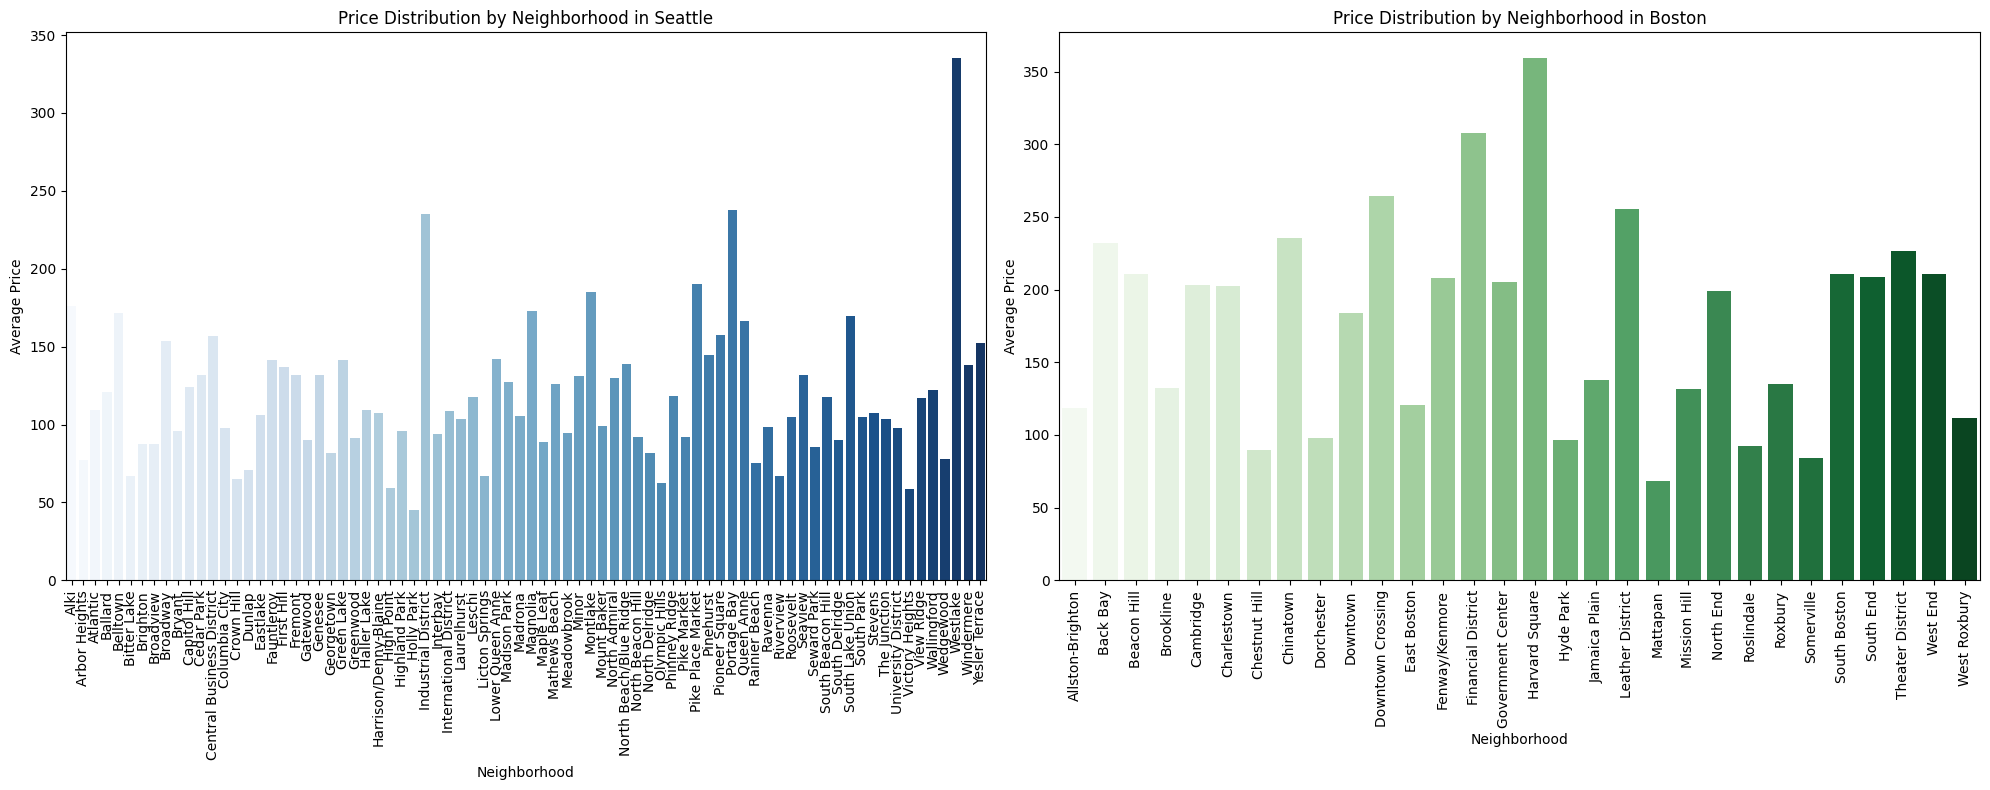

In [23]:
# Group by neighbourhood and calculate average price
neighborhood_price_seattle = seattle.groupby('neighbourhood')['price'].mean().reset_index()
neighborhood_price_boston = boston.groupby('neighbourhood')['price'].mean().reset_index()

# Set a larger figure size to accommodate long x-axis labels
plt.figure(figsize=(20, 8))

# Visualization: Bar plot for Seattle neighborhoods
plt.subplot(1, 2, 1)  # First subplot for Seattle
sns.barplot(x='neighbourhood', y='price', data=neighborhood_price_seattle, palette='Blues')
plt.title('Price Distribution by Neighborhood in Seattle')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')

# Visualization: Bar plot for Boston neighborhoods
plt.subplot(1, 2, 2)  # Second subplot for Boston
sns.barplot(x='neighbourhood', y='price', data=neighborhood_price_boston, palette='Greens')
plt.title('Price Distribution by Neighborhood in Boston')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plots
plt.show()




The charm of each neighborhood significantly influences the average price of listings in both Seattle and Boston. In Seattle, neighborhoods like the Central Business District, Pike Place Market, and South Lake Union command higher prices due to their central locations, vibrant atmosphere, and proximity to key amenities and attractions. These areas are highly desirable, attracting both tourists and residents willing to pay a premium for the convenience and lifestyle they offer. Conversely, neighborhoods like Bitter Lake and Rainier Beach, which are further from the city center and may have fewer amenities, tend to have lower average prices. Similarly, in Boston, historic and centrally located neighborhoods such as Back Bay, Beacon Hill, and Downtown Crossing have higher average prices, reflecting their desirability, rich history, and access to cultural and commercial hubs. On the other hand, neighborhoods like Dorchester and Mattapan, which might be less central or have different socio-economic characteristics, show lower average prices. The charm and unique characteristics of each neighborhood, including their location, amenities, and historical significance, play a crucial role in shaping the real estate market and influencing listing prices in these vibrant cities.

## 9. How much does the convenience of instant booking impact the price in Seattle and Boston?

<ipython-input-24-7036a94a5d0c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='instant_bookable', y='price', data=instant_bookable_price_seattle, palette='Blues')
<ipython-input-24-7036a94a5d0c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='instant_bookable', y='price', data=instant_bookable_price_boston, palette='Greens')


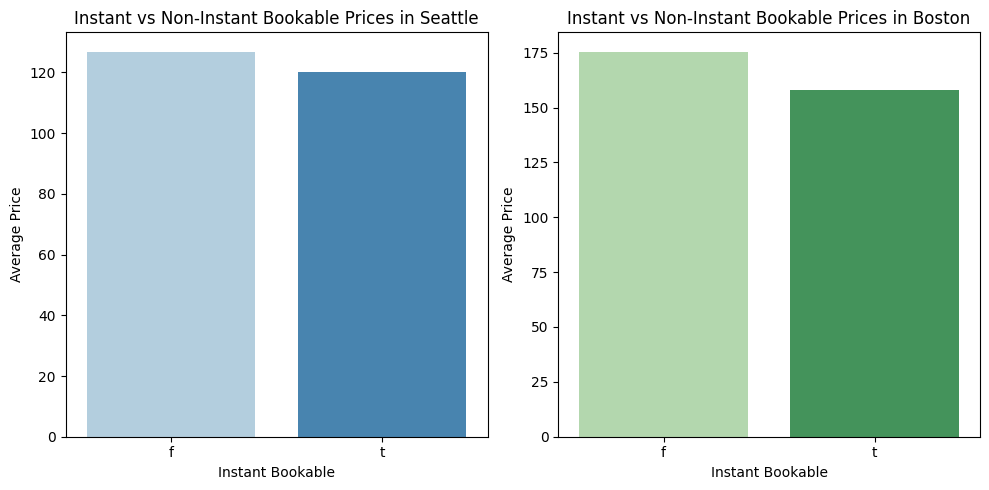

In [24]:
# Calculate average price grouped by 'instant_bookable' for Seattle and Boston
instant_bookable_price_seattle = seattle.groupby('instant_bookable')['price'].mean().reset_index()
instant_bookable_price_boston = boston.groupby('instant_bookable')['price'].mean().reset_index()

# Set the figure size for the plots
plt.figure(figsize=(10, 5))

# Visualization: Bar plot for Seattle
plt.subplot(1, 2, 1)  # First subplot
sns.barplot(x='instant_bookable', y='price', data=instant_bookable_price_seattle, palette='Blues')
plt.title('Instant vs Non-Instant Bookable Prices in Seattle')
plt.xlabel('Instant Bookable')
plt.ylabel('Average Price')

# Visualization: Bar plot for Boston
plt.subplot(1, 2, 2)  # Second subplot
sns.barplot(x='instant_bookable', y='price', data=instant_bookable_price_boston, palette='Greens')
plt.title('Instant vs Non-Instant Bookable Prices in Boston')
plt.xlabel('Instant Bookable')
plt.ylabel('Average Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plots
plt.show()



The convenience of instant booking significantly impacts the price of listings in both Seattle and Boston. Seattle, the average price for instant bookable listings is slightly higher than for non-instant bookable ones, indicating that hosts can charge a premium for the convenience of instant booking. This suggests that travelers in Seattle value the ease and immediacy of booking without waiting for host approval, leading to higher prices for such listings.

In Boston, the impact is even more pronounced. The average price for instant bookable listings is significantly higher than for non-instant bookable ones. This indicates that the convenience of instant booking is highly valued in Boston, allowing hosts to charge a substantial premium. The larger price difference suggests that travelers in Boston are willing to pay more for the assurance and speed of instant booking, making it a more influential factor in pricing compared to Seattle.

## 10. How do Seattle and Boston differ when it comes to pricing for extra guests? Dive into the scatter of extra people charges and see how each city adjusts its rates.

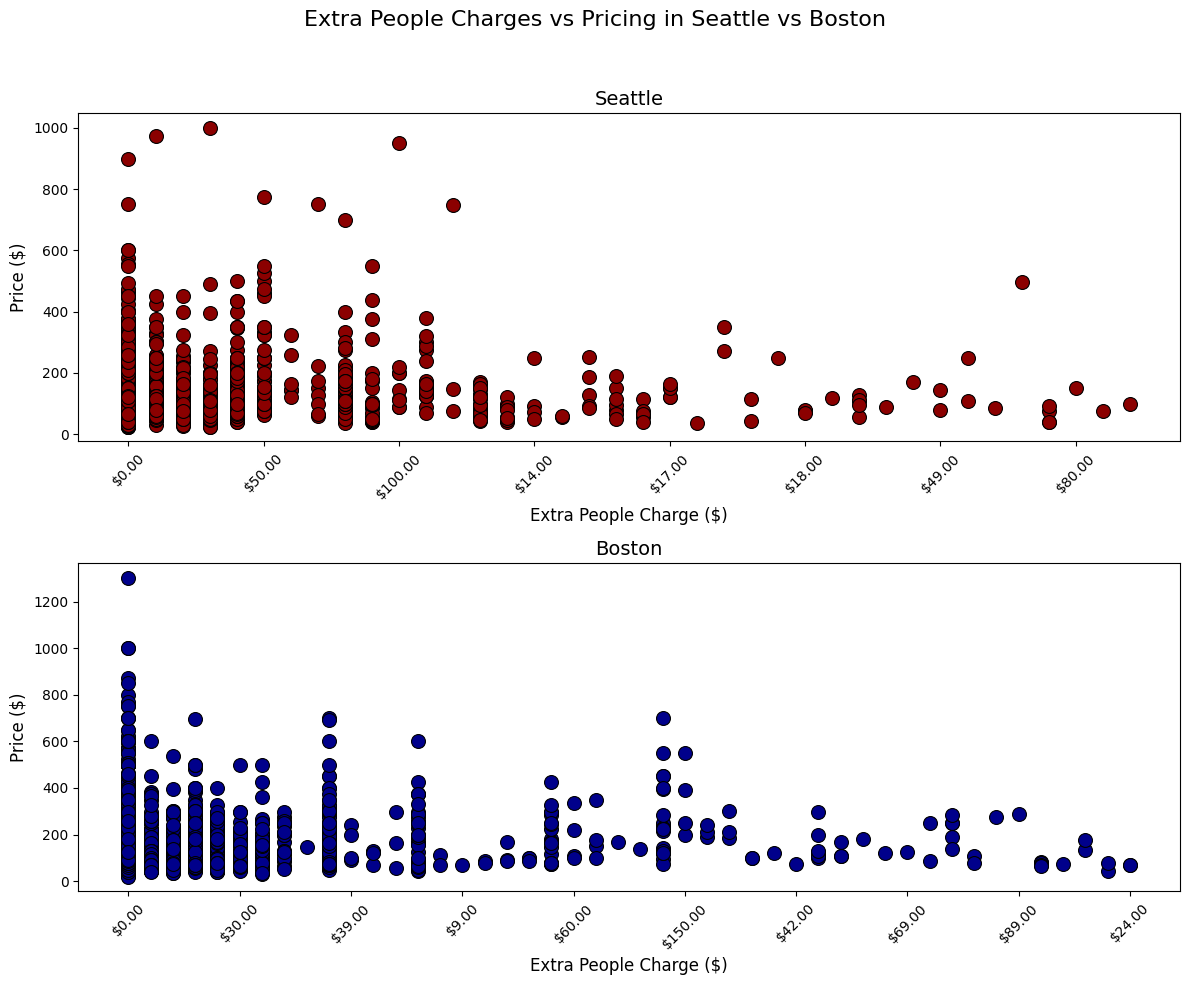

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Extra People Charges vs Pricing in Seattle vs Boston', fontsize=16)

# Scatter plot for Seattle Extra People
sns.scatterplot(x='extra_people', y='price', data=seattle, ax=axes[0], color='darkred', s=100, edgecolor='black')
axes[0].set_title('Seattle', fontsize=14)
axes[0].set_xlabel('Extra People Charge ($)', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axes[0].xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit number of x-ticks

# Scatter plot for Boston Extra People
sns.scatterplot(x='extra_people', y='price', data=boston, ax=axes[1], color='darkblue', s=100, edgecolor='black')
axes[1].set_title('Boston', fontsize=14)
axes[1].set_xlabel('Extra People Charge ($)', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
axes[1].xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit number of x-ticks

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Seattle’s pricing for extra guests is more varied, with a wider range of charges, while Boston’s pricing is more consistent and tends to be lower for extra guests.the approach to extra people charges in each city directly influences the overall pricing strategies. Seattle’s varied charges lead to a more diverse pricing landscape, while Boston’s consistent charges result in more uniform prices.

# Data preparation

In [26]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 1 to 3814
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   name                              2175 non-null   object  
 1   summary                           2175 non-null   object  
 2   space                             2175 non-null   object  
 3   description                       2175 non-null   float64 
 4   host_since                        2175 non-null   object  
 5   host_location                     2175 non-null   object  
 6   host_response_time                2175 non-null   object  
 7   host_response_rate                2175 non-null   object  
 8   host_is_superhost                 2175 non-null   object  
 9   host_neighbourhood                2175 non-null   object  
 10  host_listings_count               2175 non-null   float64 
 11  host_total_listings_count         2175 non-null   float64 
 1

In [27]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2457 entries, 1 to 3584
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   name                              2457 non-null   object  
 1   summary                           2457 non-null   object  
 2   description                       2457 non-null   float64 
 3   host_since                        2457 non-null   object  
 4   host_location                     2457 non-null   object  
 5   host_response_time                2457 non-null   object  
 6   host_response_rate                2457 non-null   object  
 7   host_acceptance_rate              2457 non-null   object  
 8   host_is_superhost                 2457 non-null   object  
 9   host_neighbourhood                2457 non-null   object  
 10  host_listings_count               2457 non-null   int64   
 11  host_total_listings_count         2457 non-null   int64   
 1

In [28]:
# converting some columns to the suitable formats
seattle['host_response_rate'] = seattle['host_response_rate'].str.replace('%', '').astype(float) / 100
seattle['extra_people'] = seattle['extra_people'].replace('[\$,]', '', regex=True).astype(float)
seattle['first_review'] = pd.to_datetime(seattle['first_review'], errors='coerce')
seattle['last_review'] = pd.to_datetime(seattle['last_review'], errors='coerce')

boston['extra_people'] = boston['extra_people'].replace('[\$,]', '', regex=True).astype(float)
boston['host_response_rate'] = boston['host_response_rate'].str.replace('%', '').astype(float) / 100
boston['host_acceptance_rate'] = boston['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
boston['host_since'] = pd.to_datetime(boston['host_since'], errors='coerce')

In [29]:
# Check the unique values in 'booking_period'
print(boston['booking_period'].unique())
print(boston['booking_period'].value_counts())

print(seattle['booking_period'].unique())
print(seattle['booking_period'].value_counts())


['Low', 'Peak Season', 'High', NaN, 'Moderate']
Categories (4, object): ['Peak Season' < 'High' < 'Moderate' < 'Low']
booking_period
Low            1024
Peak Season     540
High            393
Moderate        210
Name: count, dtype: int64
['Low', 'Moderate', 'High', 'Peak Season', NaN]
Categories (4, object): ['Peak Season' < 'High' < 'Moderate' < 'Low']
booking_period
Low            1279
Peak Season     346
High            328
Moderate        189
Name: count, dtype: int64


In [30]:
# impute with low as it is most frequent
boston['booking_period'].fillna('Low', inplace=True)
seattle['booking_period'].fillna('Low', inplace=True)

In [31]:
boston.duplicated().sum()

0

In [32]:
seattle.duplicated().sum()

0

In [33]:
cat_cols_boston = boston.select_dtypes(include=['object']).columns
cat_cols_seattle = seattle.select_dtypes(include=['object']).columns
num_cols_boston = boston.select_dtypes(include=['number']).columns
num_cols_seattle = seattle.select_dtypes(include=['number']).columns

In [34]:
seattle[cat_cols_seattle].columns.tolist()

['name',
 'summary',
 'space',
 'host_since',
 'host_location',
 'host_response_time',
 'host_is_superhost',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'calendar_updated',
 'has_availability',
 'requires_license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [35]:
!pip install category_encoders

In [36]:
# Encode categorical values
target_encoder = ce.TargetEncoder(cols=cat_cols_boston)
boston[cat_cols_boston] = target_encoder.fit_transform(boston[cat_cols_boston], boston['price'])
target_encoder = ce.TargetEncoder(cols=cat_cols_seattle)
seattle[cat_cols_seattle] = target_encoder.fit_transform(seattle[cat_cols_seattle], seattle['price'])


In [37]:
seattle.columns

Index(['name', 'summary', 'space', 'description', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accu

In [38]:
# Getting numerical columns to have similar scale
scaler = StandardScaler()
boston[num_cols_boston] = scaler.fit_transform(boston[num_cols_boston])
seattle[num_cols_seattle] = scaler.fit_transform(seattle[num_cols_seattle])


In [39]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 1 to 3814
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              2175 non-null   float64       
 1   summary                           2175 non-null   float64       
 2   space                             2175 non-null   float64       
 3   description                       2175 non-null   float64       
 4   host_since                        2175 non-null   float64       
 5   host_location                     2175 non-null   float64       
 6   host_response_time                2175 non-null   float64       
 7   host_response_rate                2175 non-null   float64       
 8   host_is_superhost                 2175 non-null   float64       
 9   host_neighbourhood                2175 non-null   float64       
 10  host_listings_count               2175 non-null   flo

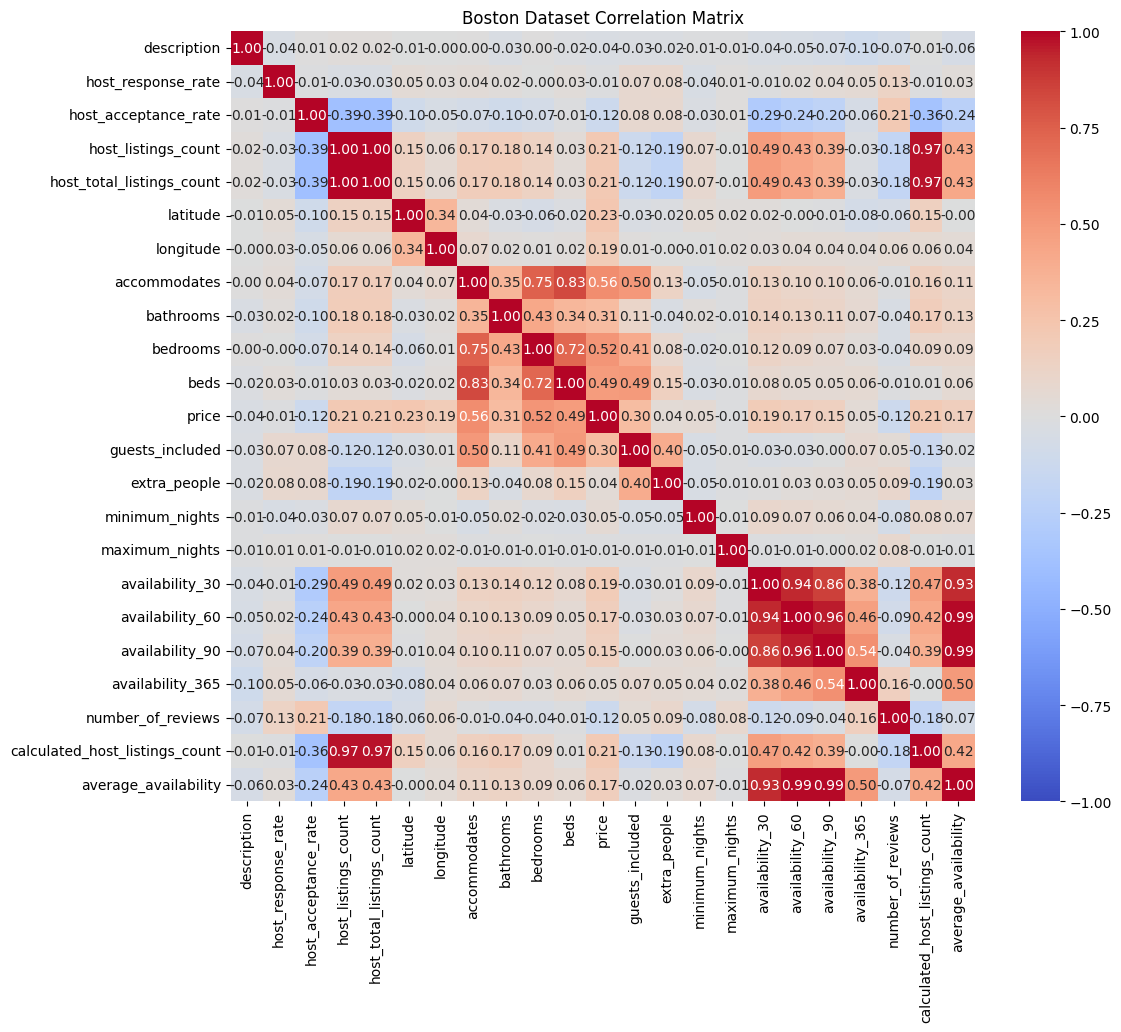

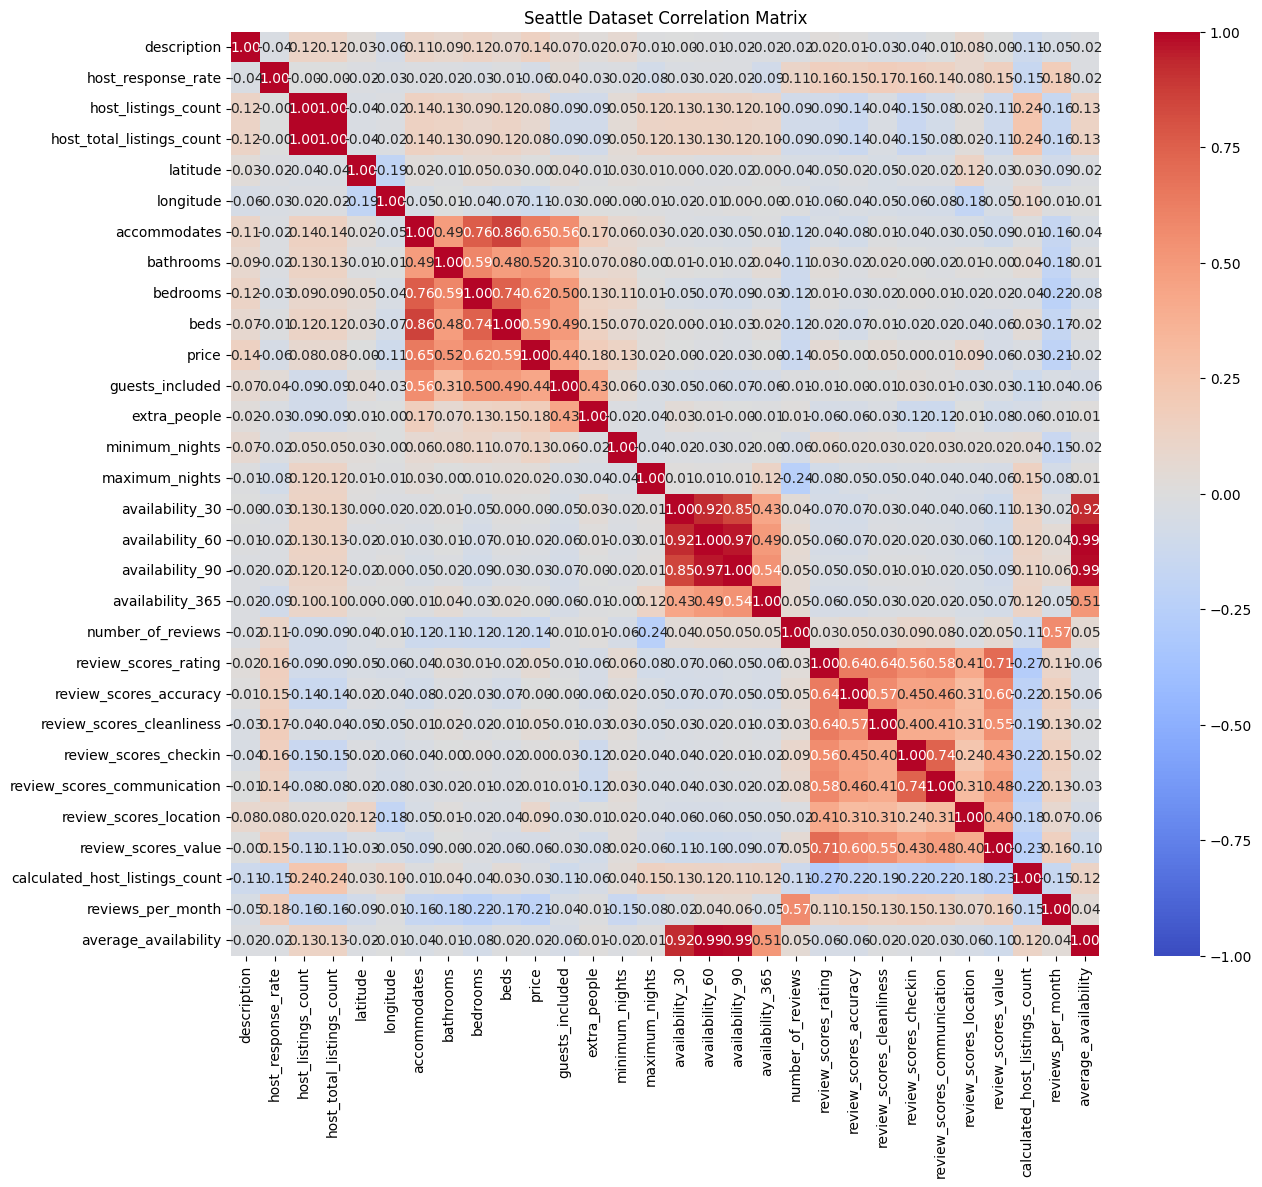

In [40]:
# Calculate the correlation matrix for numerical features
corr_boston = boston[num_cols_boston].corr()
corr_seattle = seattle[num_cols_seattle].corr()
# Plot heatmap for Boston dataset
plt.figure(figsize=(12, 10))
sns.heatmap(corr_boston, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Boston Dataset Correlation Matrix')
plt.show()

# Plot heatmap for Seattle dataset
plt.figure(figsize=(14, 12))
sns.heatmap(corr_seattle, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Seattle Dataset Correlation Matrix')
plt.show()

The correlation matrices for Seattle and Boston reveal distinct patterns in how various factors influence pricing. In Seattle, variables like accommodates, bedrooms, and beds show strong positive correlations with price, indicating that larger and more amenity-rich listings command higher prices. Conversely, Boston’s matrix highlights a similar trend but with a more pronounced positive correlation between price and accommodates, bedrooms, and bathrooms. Both cities show that high review scores positively impact prices, but Seattle’s pricing strategy appears more diverse, while Boston’s is more consistent. This comparison underscores the unique market dynamics and host strategies in each city, reflecting their different approaches to optimizing listing prices.

In [41]:
pca_boston = PCA()
pca_seattle = PCA()

# Fit and transform the data
pca_boston_result = pca_boston.fit_transform(boston[num_cols_boston])
pca_seattle_result = pca_seattle.fit_transform(seattle[num_cols_seattle])

# Explained variance ratio
explained_variance_boston = pca_boston.explained_variance_ratio_
explained_variance_seattle = pca_seattle.explained_variance_ratio_


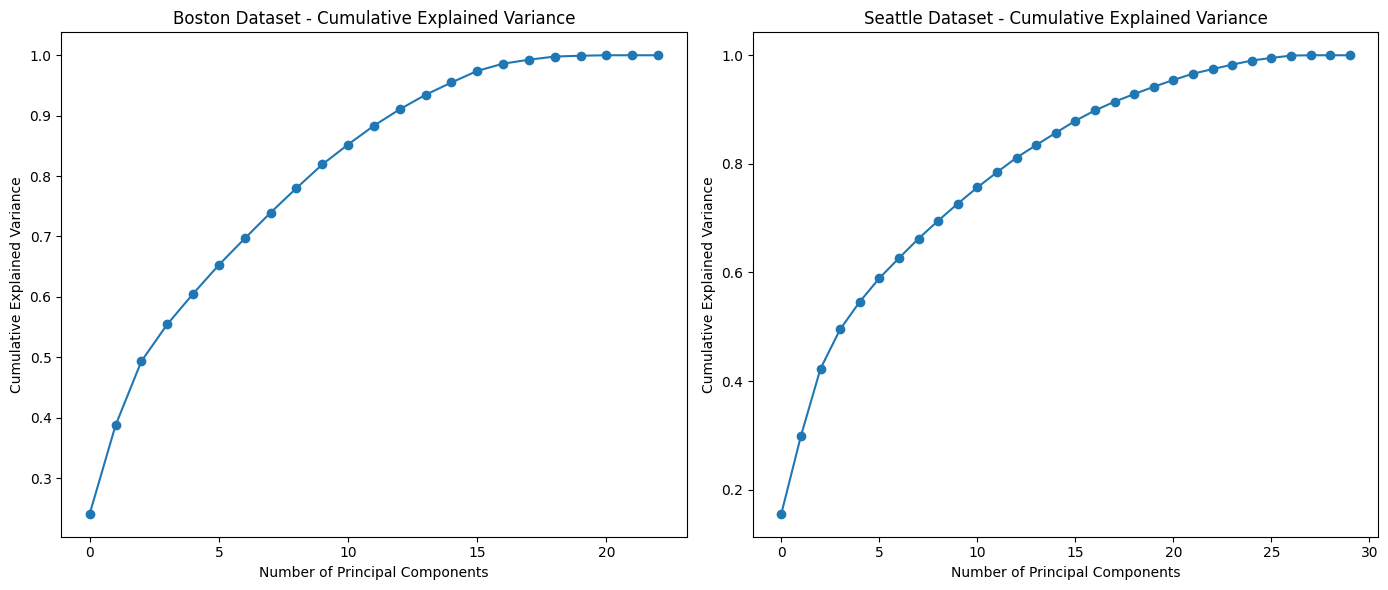

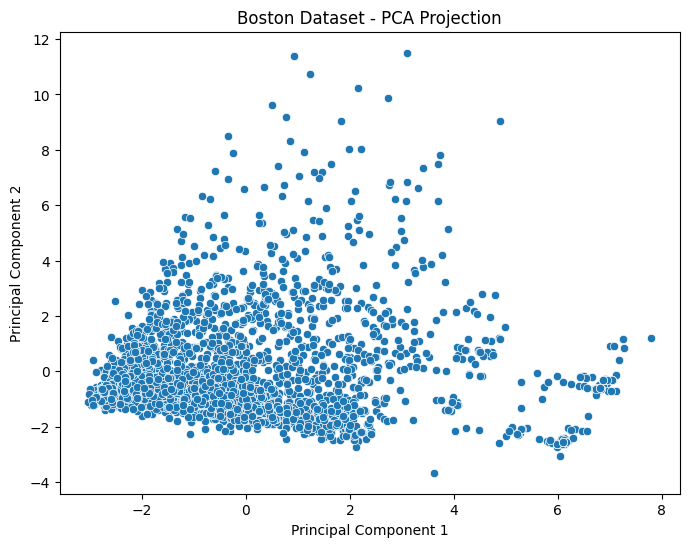

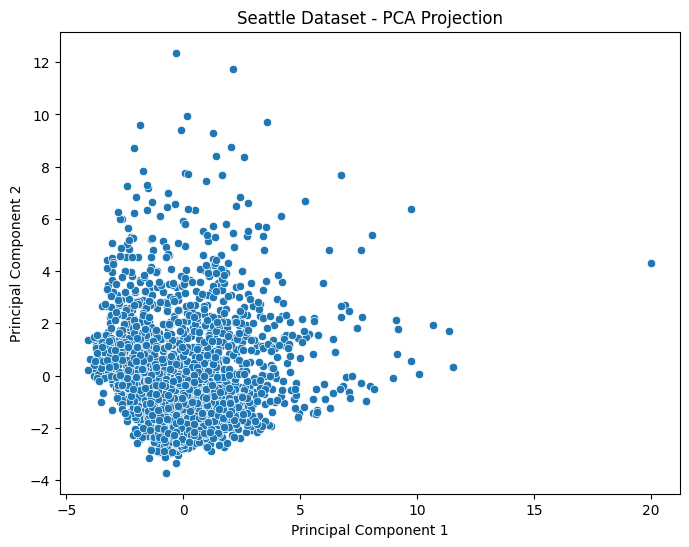

In [42]:
# Plot explained variance ratio
plt.figure(figsize=(14, 6))

# Boston
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(explained_variance_boston), marker='o')
plt.title('Boston Dataset - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Seattle
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(explained_variance_seattle), marker='o')
plt.title('Seattle Dataset - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

# Plot PCA projection onto the first two principal components
def plot_pca_projection(pca_result, title):
    df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', data=df_pca)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Boston PCA projection
plot_pca_projection(pca_boston_result[:, :2], 'Boston Dataset - PCA Projection')

# Seattle PCA projection
plot_pca_projection(pca_seattle_result[:, :2], 'Seattle Dataset - PCA Projection')


 For both Boston and Seattle, the cumulative explained variance increases with the number of principal components, indicating that a few components can capture most of the data’s variability.
 However I mainly used it to manage Multicollinearity and feature reduction.

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_boston_pca = pca_boston_result
y_boston = boston['price']
X_seattle_pca = pca_seattle_result
y_seattle = seattle['price']

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston_pca, y_boston, test_size=0.2, random_state=42)
X_train_seattle, X_test_seattle, y_train_seattle, y_test_seattle = train_test_split(X_seattle_pca, y_seattle, test_size=0.2, random_state=42)

# Apply Ridge regression
model_boston = Ridge(alpha=1.0)
model_boston.fit(X_train_boston, y_train_boston)

model_seattle = Ridge(alpha=1.0)
model_seattle.fit(X_train_seattle, y_train_seattle)

y_pred_boston = model_boston.predict(X_test_boston)
mse_boston = mean_squared_error(y_test_boston, y_pred_boston)
r2_boston = r2_score(y_test_boston, y_pred_boston)

y_pred_seattle = model_seattle.predict(X_test_seattle)
mse_seattle = mean_squared_error(y_test_seattle, y_pred_seattle)
r2_seattle = r2_score(y_test_seattle, y_pred_seattle)

print(f"Boston - Mean Squared Error: {mse_boston}, R-squared: {r2_boston}")
print(f"Seattle - Mean Squared Error: {mse_seattle}, R-squared: {r2_seattle}")



Boston - Mean Squared Error: 3.446003223380304e-07, R-squared: 0.999999630398274
Seattle - Mean Squared Error: 1.122711254752975e-06, R-squared: 0.9999989498132729


### PROMISING RESULT!!
but let's do cross validation to check if it's not overfitting

In [44]:
from sklearn.model_selection import cross_val_score

cv_scores_boston = cross_val_score(model_boston, X_boston_pca, y_boston, cv=5, scoring='r2')
print(f"Boston - Cross-Validation R-squared scores: {cv_scores_boston}")
print(f"Boston - Mean R-squared: {cv_scores_boston.mean()}")

# Perform cross-validation for Seattle
cv_scores_seattle = cross_val_score(model_seattle, X_seattle_pca, y_seattle, cv=5, scoring='r2')
print(f"Seattle - Cross-Validation R-squared scores: {cv_scores_seattle}")
print(f"Seattle - Mean R-squared: {cv_scores_seattle.mean()}")

Boston - Cross-Validation R-squared scores: [0.99999971 0.99999945 0.99999907 0.9999995  0.99999952]
Boston - Mean R-squared: 0.9999994479819181
Seattle - Cross-Validation R-squared scores: [0.99999944 0.99999858 0.99999905 0.99999942 0.9999992 ]
Seattle - Mean R-squared: 0.999999138826437
